In [28]:
# importation des librairies
import numpy as np
import time
import keras
from keras.datasets import mnist
from keras.layers import Dropout
from keras.utils import np_utils
from keras import models
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import optimizers

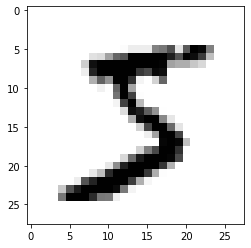

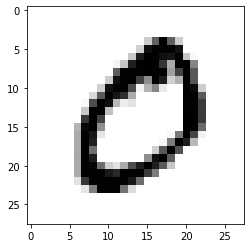

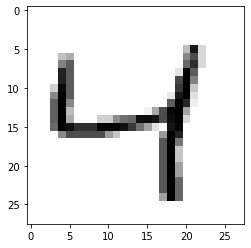

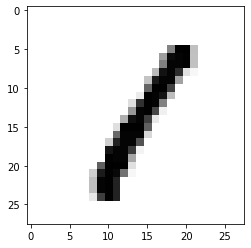

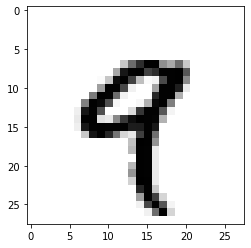

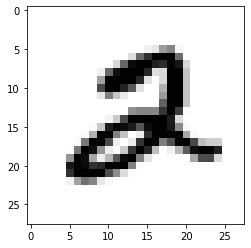

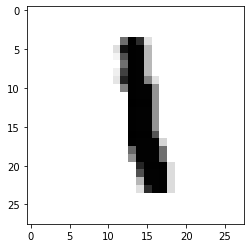

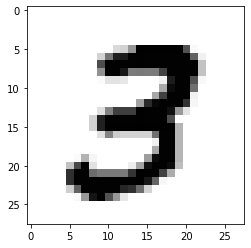

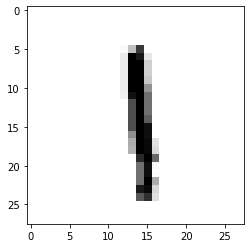

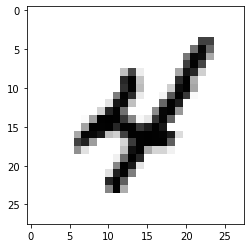

In [29]:

# préparation des données
K=10;
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Visualiser les données
for i in range(10):
    digit=X_train[i]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

X_train=X_train.reshape(60000, 784)
X_test=X_test.reshape(10000, 784)
X_train=X_train.astype('float32')  
X_test=X_test.astype('float32')
X_train/=255
X_test/=255




# print (Y_train[18])

#convertir class vecteur to binary class matrices
Y_train = np_utils.to_categorical(Y_train, K)
Y_test = np_utils.to_categorical(Y_test, K)

# print (Y_train[18])

In [30]:


# création du modele

model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,))) 
model.add(layers.Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 300)               153900    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2010      
Total params: 618,030
Trainable params: 618,030
Non-trainable params: 0
________________________________________________

In [31]:
# compilation du modèle
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

In [32]:
# Entraiement du modèle
# callbacks = [keras.callbacks.TensorBoard(log_dir='./my_log_dir', histogram_freq=1,)]
history=model.fit(X_train, Y_train, epochs=10, batch_size=512, validation_data=(X_test, Y_test))
# history=model.fit(X_train, Y_train, epochs=10, batch_size=512, validation_data=(X_test, Y_test), callbacks=callback)
# history_dict=history.history
# history_dict.keys()


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0229 - accuracy: 0.8387 - val_loss: 0.0107 - val_accuracy: 0.9291
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0086 - accuracy: 0.9451 - val_loss: 0.0063 - val_accuracy: 0.9585
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0061 - accuracy: 0.9607 - val_loss: 0.0044 - val_accuracy: 0.9724
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0045 - accuracy: 0.9717 - val_loss: 0.0044 - val_accuracy: 0.9715
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0039 - accuracy: 0.9758 - val_loss: 0.0037 - val_accuracy: 0.9767
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0031 - accuracy: 0.9804 - val_loss: 0.0038 - val_accuracy: 0.9750
Epoch 7/10
60000/60000 [==============================] - 2s 26us/st

10000/10000 [==============================] - 0s 29us/step
Resultats apprentissage
Valeur perte finale (loss) 0.0034184766727647967


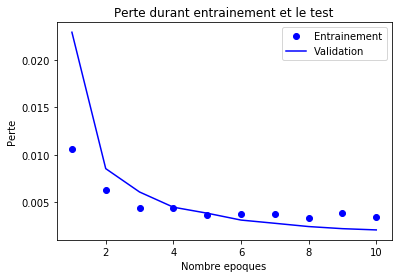

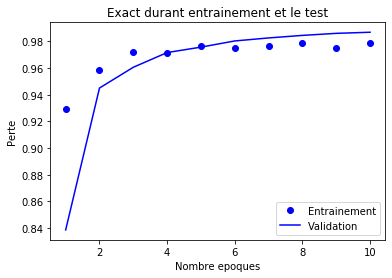

In [33]:
# affichahe des résultats de l'évaluation du modèle
results=model.evaluate(X_test, Y_test)
print('Resultats apprentissage')
print ('Valeur perte finale (loss)', results[0])


# Tracé de la perte pendant l'entraienemnt et la validation
history_dict=history.history
loss_values=history_dict['val_loss']
loss_accuracy=history_dict['loss']
epochs = range(1, len(loss_accuracy)+1)
# 'bo': Trait en pointillé
plt.plot(epochs, loss_values, 'bo', label='Entrainement')

# 'b': Trait en continue
plt.plot(epochs, loss_accuracy, 'b', label='Validation')

plt.title('Perte durant entrainement et le test')
plt.xlabel('Nombre epoques')
plt.ylabel('Perte')
plt.legend()

plt.show()

# Tracé de la précision durant l'entrainement' et la validation
loss_values=history_dict['val_accuracy']
loss_accuracy=history_dict['accuracy']
epochs = range(1, len(loss_accuracy)+1)
# 'bo': Trait en pointillé
plt.plot(epochs, loss_values, 'bo', label='Entrainement')

# 'b': Trait en continue
plt.plot(epochs, loss_accuracy, 'b', label='Validation')

plt.title('Exact durant entrainement et le test')
plt.xlabel('Nombre epoques')
plt.ylabel('Perte')
plt.legend()

plt.show()




In [34]:
yy=model.predict(X_test[0])
print("prediction de l'exemple)", yy)


ValueError: Error when checking input: expected dense_13_input to have shape (784,) but got array with shape (1,)

In [25]:
!cd desktop

/bin/sh: line 0: cd: desktop: No such file or directory


In [26]:
!ls

Entrainement_AvecConvolution_MNIST.ipynb
Entrainement_Sans_Convolution_MNIST.ipynb
Lecture_et_Preparationdonnees.ipynb
Regression_Logistique.ipynb


ValueError: Error when checking input: expected dense_9_input to have shape (784,) but got array with shape (28,)